In [1]:
# Dependencies
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt
from datetime import timedelta
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Accidents_df = pd.read_csv("resources/USAccidents_Clean.csv")

In [3]:
Accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37650 entries, 0 to 37649
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         37650 non-null  int64  
 1   Severity           37650 non-null  int64  
 2   Start_Time         37650 non-null  object 
 3   End_Time           37650 non-null  object 
 4   Start_Lat          37650 non-null  float64
 5   Start_Lng          37650 non-null  float64
 6   City               37650 non-null  object 
 7   State              37650 non-null  object 
 8   Weather_Condition  37650 non-null  object 
 9   Year               37650 non-null  int64  
 10  Amenity            37650 non-null  bool   
 11  Bump               37650 non-null  bool   
 12  Crossing           37650 non-null  bool   
 13  Give_Way           37650 non-null  bool   
 14  Junction           37650 non-null  bool   
 15  No_Exit            37650 non-null  bool   
 16  Railway            376

In [4]:
# Find the missing values
Accidents_df.isnull().sum()

Unnamed: 0           0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
City                 0
State                0
Weather_Condition    0
Year                 0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Time                 0
StartDate            0
Start_year           0
dtype: int64

In [5]:
target_cols = ['Severity','Start_Time','End_Time','Start_Lat','Start_Lng','City','State','Weather_Condition','Year',
               'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station',
              'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']

In [6]:
Accidents_df = Accidents_df[target_cols].copy()


In [7]:
Accidents_df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,True,False,True,False
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,False,False,False
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,False,False,False
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,False,False,False
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
Accidents_df['Time']= pd.to_datetime(Accidents_df['Start_Time'],errors='coerce').dt.time
Accidents_df['StartDate'] = pd.to_datetime(Accidents_df['Start_Time'],errors='coerce').dt.date

In [9]:
Accidents_df.head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,True,False,True,False,01:33:00,2020-11-28
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,False,12:05:00,2020-11-07
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,False,17:10:00,2020-11-03
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,False,02:32:00,2020-11-10
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,False,05:22:00,2020-12-23


In [10]:
Accidents_df['StartDate'] = Accidents_df['StartDate'].astype('datetime64')

In [11]:
Accidents_df['Start_year'] = pd.to_datetime(Accidents_df['StartDate'],errors='ignore').dt.year
Accidents_df.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,True,False,True,False,01:33:00,2020-11-28,2020
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,12:05:00,2020-11-07,2020
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,17:10:00,2020-11-03,2020
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,02:32:00,2020-11-10,2020
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,05:22:00,2020-12-23,2020
5,2,10/26/2020 15:47,10/26/2020 17:47,32.802467,-96.789648,Dallas,TX,Cloudy,2020,False,...,False,False,False,False,False,False,False,15:47:00,2020-10-26,2020
6,2,12/28/2020 20:27,12/28/2020 23:30,34.023960,-118.427585,Los Angeles,CA,Partly Cloudy,2020,False,...,False,False,False,False,False,False,False,20:27:00,2020-12-28,2020
7,2,11/14/2020 6:14,11/14/2020 7:29,32.782353,-96.683218,Dallas,TX,Cloudy,2020,False,...,False,False,False,False,False,True,False,06:14:00,2020-11-14,2020
8,2,11/25/2020 12:12,11/26/2020 5:11,40.847107,-73.933376,New York,NY,Mostly Cloudy,2020,False,...,False,False,False,False,False,False,False,12:12:00,2020-11-25,2020
9,2,9/30/2020 12:50,9/30/2020 20:43,40.847867,-73.934797,New York,NY,Fair,2020,True,...,False,False,False,False,False,True,False,12:50:00,2020-09-30,2020


In [12]:
Accidents_df['Start_year'] = Accidents_df['Start_year'].astype('int64',errors='ignore')

In [13]:
Accidents_df.head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,True,False,True,False,01:33:00,2020-11-28,2020
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,12:05:00,2020-11-07,2020
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,17:10:00,2020-11-03,2020
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,02:32:00,2020-11-10,2020
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,05:22:00,2020-12-23,2020


In [14]:
Accidents_df.dropna()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,True,False,True,False,01:33:00,2020-11-28,2020
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,12:05:00,2020-11-07,2020
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,17:10:00,2020-11-03,2020
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,02:32:00,2020-11-10,2020
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,05:22:00,2020-12-23,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2,12/10/2019 16:42,12/10/2019 17:15,32.795170,-117.208700,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:42:00,2019-12-10,2019
37646,2,12/10/2019 16:41,12/10/2019 18:49,32.795171,-117.208671,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:41:00,2019-12-10,2019
37647,2,12/10/2019 16:43,12/10/2019 17:35,32.806762,-117.215972,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:43:00,2019-12-10,2019
37648,2,12/10/2019 16:53,12/10/2019 17:48,34.039993,-118.291563,Los Angeles,CA,Cloudy,2019,False,...,False,False,False,False,False,True,False,16:53:00,2019-12-10,2019


In [15]:
is_NaN = Accidents_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = Accidents_df[row_has_NaN]
rows_with_NaN.dropna()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year


In [16]:
Accidents_df.dropna(how = 'any',inplace=True)
Accidents_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,True,False,True,False,01:33:00,2020-11-28,2020
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,12:05:00,2020-11-07,2020
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,17:10:00,2020-11-03,2020
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,02:32:00,2020-11-10,2020
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,05:22:00,2020-12-23,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2,12/10/2019 16:42,12/10/2019 17:15,32.795170,-117.208700,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:42:00,2019-12-10,2019
37646,2,12/10/2019 16:41,12/10/2019 18:49,32.795171,-117.208671,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:41:00,2019-12-10,2019
37647,2,12/10/2019 16:43,12/10/2019 17:35,32.806762,-117.215972,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:43:00,2019-12-10,2019
37648,2,12/10/2019 16:53,12/10/2019 17:48,34.039993,-118.291563,Los Angeles,CA,Cloudy,2019,False,...,False,False,False,False,False,True,False,16:53:00,2019-12-10,2019


In [17]:
Accidents_df.drop(Accidents_df[Accidents_df['Year'] == 1900].index, inplace = True)
Accidents_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,True,False,True,False,01:33:00,2020-11-28,2020
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,12:05:00,2020-11-07,2020
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,17:10:00,2020-11-03,2020
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,02:32:00,2020-11-10,2020
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,05:22:00,2020-12-23,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2,12/10/2019 16:42,12/10/2019 17:15,32.795170,-117.208700,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:42:00,2019-12-10,2019
37646,2,12/10/2019 16:41,12/10/2019 18:49,32.795171,-117.208671,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:41:00,2019-12-10,2019
37647,2,12/10/2019 16:43,12/10/2019 17:35,32.806762,-117.215972,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:43:00,2019-12-10,2019
37648,2,12/10/2019 16:53,12/10/2019 17:48,34.039993,-118.291563,Los Angeles,CA,Cloudy,2019,False,...,False,False,False,False,False,True,False,16:53:00,2019-12-10,2019


In [18]:
Accidents_df.Start_year.unique()

array([2020, 2019])

In [19]:
NewFile_df = Accidents_df.loc[(Accidents_df['Start_year']== 2019.0)|(Accidents_df['Start_year']== 2020.0)]
NewFile_df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,True,False,True,False,01:33:00,2020-11-28,2020
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,12:05:00,2020-11-07,2020
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,17:10:00,2020-11-03,2020
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,02:32:00,2020-11-10,2020
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,05:22:00,2020-12-23,2020


In [20]:
SelectCities_df = NewFile_df.loc[(NewFile_df['City']== 'Dallas')|(NewFile_df['City']== 'New York')|(NewFile_df['City']== 'San Diego')|(NewFile_df['City']== 'Los Angeles')]
SelectCities_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Weather_Condition,Year,Amenity,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Time,StartDate,Start_year
0,2,11/28/2020 1:33,11/28/2020 3:13,33.963490,-118.370694,Los Angeles,CA,Fair,2020,False,...,False,False,False,True,False,True,False,01:33:00,2020-11-28,2020
1,2,11/7/2020 12:05,11/7/2020 16:03,32.917963,-96.856461,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,12:05:00,2020-11-07,2020
2,2,11/3/2020 17:10,11/3/2020 18:00,32.921262,-96.848712,Dallas,TX,Fair,2020,False,...,False,False,False,False,False,False,False,17:10:00,2020-11-03,2020
3,2,11/10/2020 2:32,11/10/2020 4:46,34.152964,-118.278776,Los Angeles,CA,Fair,2020,False,...,False,False,False,False,False,False,False,02:32:00,2020-11-10,2020
4,2,12/23/2020 5:22,12/23/2020 11:31,34.071218,-118.235087,Los Angeles,CA,Haze,2020,False,...,False,False,False,False,False,False,False,05:22:00,2020-12-23,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2,12/10/2019 16:42,12/10/2019 17:15,32.795170,-117.208700,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:42:00,2019-12-10,2019
37646,2,12/10/2019 16:41,12/10/2019 18:49,32.795171,-117.208671,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:41:00,2019-12-10,2019
37647,2,12/10/2019 16:43,12/10/2019 17:35,32.806762,-117.215972,San Diego,CA,Cloudy,2019,False,...,False,False,False,False,False,False,False,16:43:00,2019-12-10,2019
37648,2,12/10/2019 16:53,12/10/2019 17:48,34.039993,-118.291563,Los Angeles,CA,Cloudy,2019,False,...,False,False,False,False,False,True,False,16:53:00,2019-12-10,2019


In [21]:
Cities_by_accident = SelectCities_df.City.value_counts()
Cities_by_accident

Los Angeles    20126
Dallas          8766
San Diego       6767
New York        1991
Name: City, dtype: int64

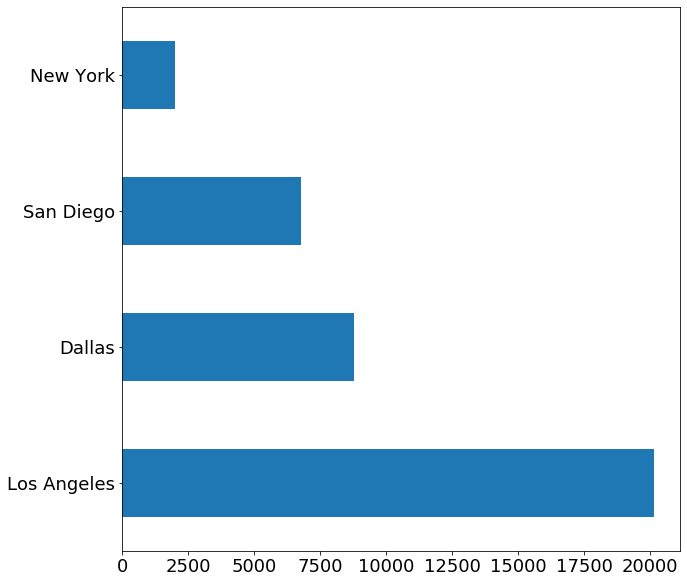

In [22]:
Cities_by_accident[:20].plot(kind= 'barh', figsize=(10,10), fontsize=18)

In [23]:
Severity = SelectCities_df['Severity'].value_counts()
Severity

2    34887
3     1973
4      783
1        7
Name: Severity, dtype: int64

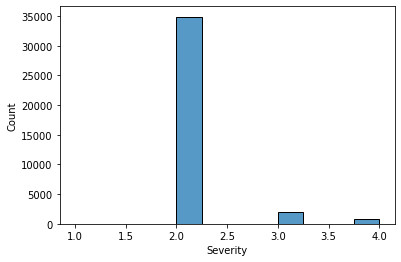

In [24]:
sns.histplot(NewFile_df.Severity,bins=12)

In [25]:
json = SelectCities_df.to_json("resources/USAccidents.json")

In [26]:
SelectCities_df.to_csv("resources/USAccidents_Clean.csv")
